In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools
from sklearn import metrics
import datetime
%matplotlib inline
import os

In [3]:
#path = "../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/" #Joe
path = "../../../../Google Drive/ML Project (Collisions)/" # Joyce
# path = "" # Lucas

In [4]:
with open(path+"data_for_training/v4/collisions_no1hot.pkl", 'rb') as infile:
    df_no1hot = pickle.load(infile)

In [5]:
df_no1hot = df_no1hot.sort_values('date_time')

In [6]:
view_date = pd.to_datetime(df_no1hot['date_time'])

train_indices = (0, np.sum(view_date < datetime.date(2015,9,12))-1)
val_indices = (train_indices[1]+1,\
               train_indices[1] + \
               np.sum((view_date >= datetime.date(2015,9,12)) & (view_date < datetime.date(2016,7,31))))
test_indices = (val_indices[1]+1,\
               val_indices[1] + np.sum(view_date >= datetime.date(2016,7,31)))

In [7]:
target_variable = 'injured_or_killed'
column_names = [i for i in pickle.load(open(path+'data_for_training/v4/collisions_1hot.pkl', 'rb')).columns.values if i != target_variable]

In [8]:
with open(path+"data_for_training/v4/collisions_1hot.pkl", 'rb') as infile:
    df = pickle.load(infile)

view_date = pd.to_datetime(df['date_time'])

train_indices = (0, np.sum(view_date < datetime.date(2015,9,12))-1)
val_indices = (train_indices[1]+1,train_indices[1] + np.sum((view_date >= datetime.date(2015,9,12)) & (view_date < datetime.date(2016,7,31))))
test_indices = (val_indices[1]+1, val_indices[1] + np.sum(view_date >= datetime.date(2016,7,31)))

In [9]:
X_train = df.iloc[train_indices[0]:train_indices[1]].drop(['injured_or_killed'], axis=1)
y_train = df.iloc[train_indices[0]:train_indices[1]]['injured_or_killed']
X_val = df.iloc[val_indices[0]:val_indices[1]].drop(['injured_or_killed'], axis=1)
y_val = df.iloc[val_indices[0]:val_indices[1]]['injured_or_killed']
X_test = df.iloc[test_indices[0]:test_indices[1]].drop(['injured_or_killed'], axis=1)
y_test = df.iloc[test_indices[0]:test_indices[1]]['injured_or_killed']

In [11]:
AUCs = pd.Series([0, .70863, .7272, .7605], index = [0, 5, 10, 20])

all_None.pkl


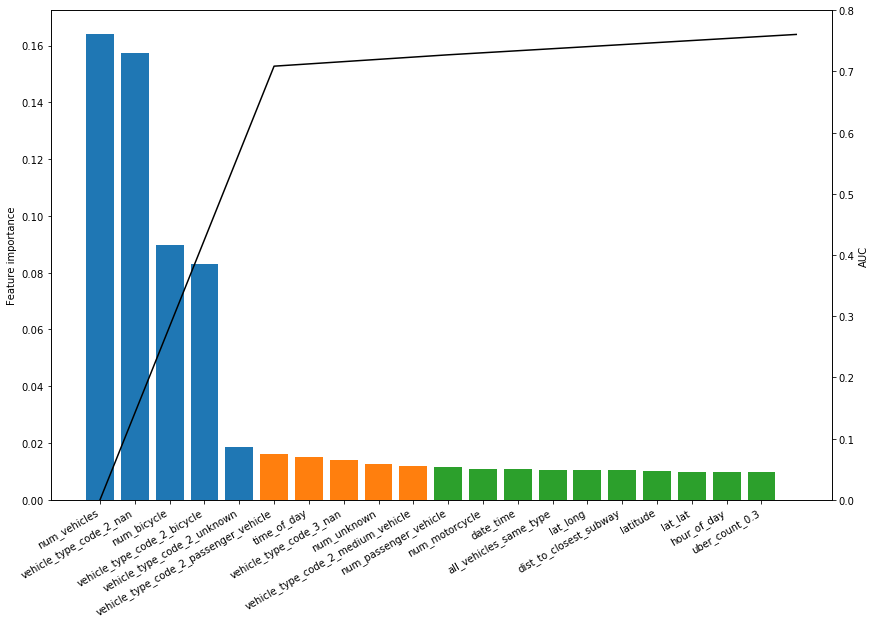

In [20]:
rf = {}

for file in ['all_None.pkl']:
    with open(os.path.join(path+"models/", file), 'rb') as infile:
        rf[file] = pickle.load(infile)

    print(file)
    fig, ax1 = plt.subplots(figsize=(14, 10))
    num_features = 20
    y_pos = np.arange(num_features)

    importances = pd.Series(rf[file].feature_importances_, index=column_names)
    topX = importances.sort_values(ascending = False)[:num_features]
    
    topXa = topX*[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    topXb = topX*[0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
    topXc = topX*[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
    plt.bar(y_pos, topXa)
    plt.bar(y_pos, topXb)
    plt.bar(y_pos, topXc)
    plt.xticks(y_pos, topX.index)
    ax1.set_ylabel('Feature importance')
    
    ax2 = ax1.twinx()
    ax2.plot(AUCs, color = 'black')
    ax2.set_ylabel('AUC')
    ax2.set_ylim([0, 0.8])
    
    fig.autofmt_xdate()

In [10]:
importances = pd.Series(rf['all_None.pkl'].feature_importances_, index=column_names).sort_values(ascending = False)

In [11]:
with open(path+"feature_importances/RF.pkl", 'wb') as infile:
    pickle.dump(importances, infile, pickle.HIGHEST_PROTOCOL)

In [21]:
X_train.loc[:, importances[:20].index]

,num_vehicles,vehicle_type_code_2_nan,num_bicycle,vehicle_type_code_2_bicycle,vehicle_type_code_2_unknown,vehicle_type_code_2_passenger_vehicle,time_of_day,vehicle_type_code_3_nan,num_unknown,vehicle_type_code_2_medium_vehicle,num_passenger_vehicle,num_motorcycle,date_time,all_vehicles_same_type,lat_long,dist_to_closest_subway,latitude,lat_lat,hour_of_day,uber_count_0.3
UNIQUE KEY,,,,,,,,,,,,,,,,,,,,
37632,2,False,0,0,0,0,5,True,0,0,1,0,1341101100000000000,False,-3016.290837,805.192263,40.762127,1661.550965,0,28427.000000
2999940,2,False,0,0,0,1,5,True,0,0,2,0,1341101100000000000,True,-3004.060532,441.465552,40.697753,1656.307116,0,3629.000000
3044659,4,False,0,0,0,1,10,False,0,0,4,0,1341101400000000000,True,-3011.184889,1121.585354,40.733610,1659.226984,0,3629.000000
116256,2,False,0,0,0,0,10,True,0,1,1,0,1341101400000000000,False,-3002.469951,190.566527,40.588868,1647.456189,0,295.000000
175808,2,False,1,1,0,0,20,True,1,0,0,0,1341102000000000000,False,-3009.438459,26.152565,40.677406,1654.651326,0,28427.000000
2836632,2,False,0,0,0,1,21,True,0,0,1,0,1341102060000000000,False,-3010.188620,1552.972246,40.720963,1658.254444,0,9699.395016
78654,2,False,0,0,0,1,22,True,0,0,2,0,1341102120000000000,True,-3017.472530,928.201656,40.824188,1666.614359,0,3629.000000
125655,2,False,0,0,0,1,23,True,0,0,2,0,1341102180000000000,True,-3001.537033,3456.544611,40.607179,1648.942954,0,163.000000
264072,2,False,0,0,0,1,25,True,0,0,2,0,1341102300000000000,True,-3007.900283,955.592701,40.732979,1659.175595,0,3629.000000


In [23]:
rf['all_None.pkl']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)